# k-armed bandit

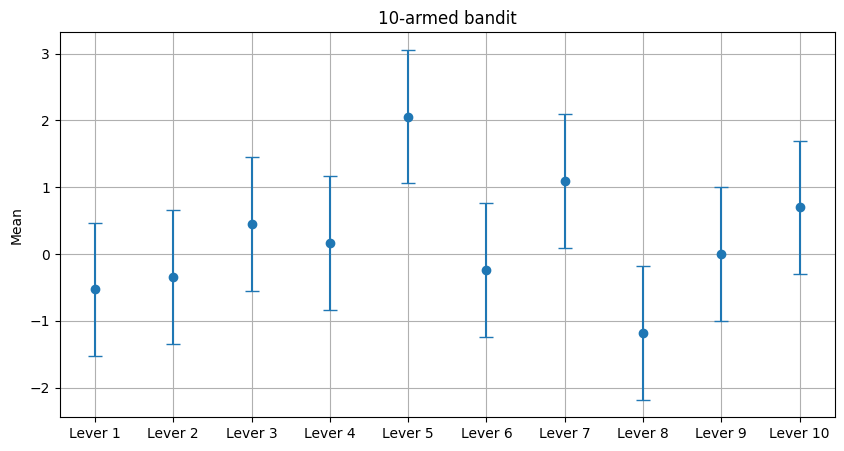

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# k-armed bandit
means = np.random.randn(10)  # Mean values for each group
std_devs = np.ones(10)  # Standard deviations for each group

# Create x-values for the groups
x_values = np.arange(len(means))

# Create a plot with error bars
plt.figure(figsize=(10, 5))
plt.errorbar(x_values, means, yerr=std_devs, fmt='o', capsize=5)
plt.xticks(x_values, ['Lever 1', 'Lever 2', 'Lever 3', 'Lever 4', 'Lever 5', 'Lever 6', 'Lever 7', 'Lever 8', 'Lever 9', 'Lever 10'])
plt.ylabel('Mean')
plt.title('10-armed bandit')
plt.grid(True)
plt.show()


### $\epsilon$-greedy action selection

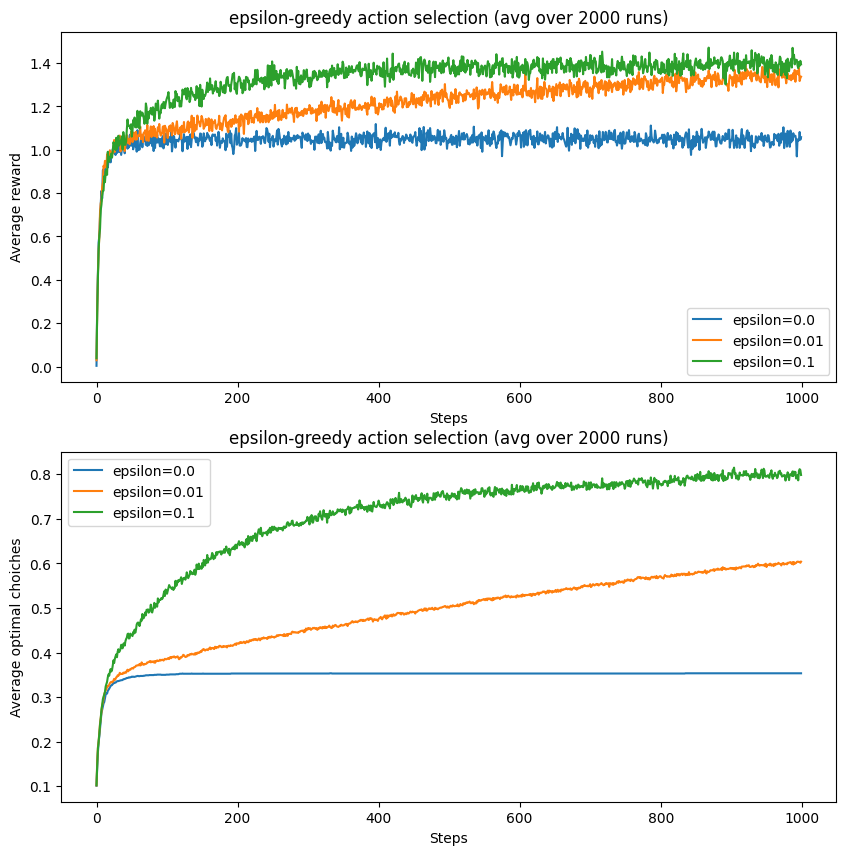

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# epsilon-greedy action selection
def next_action(Q, epsilon=0):
    if np.random.rand() < epsilon:
        return np.random.randint(0, len(Q))
    else:
        return np.argmax(Q)
    
# k-armed bandit
q = []
for i in range(2000):
    q.append(np.random.randn(10))

# rewards with different epsilon
plt.figure(figsize=(10, 10))
ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)
n_steps = 1000      # number of steps 1000
runs = 2000       # number of iterations 2000

for epsilon in [0.0, 0.01, 0.1]:
    Q = np.zeros((runs, 10))
    N = np.zeros((runs, 10))
    histories = []
    optimal_choiches = []
    for j in range(runs):
        history = []
        optimal_choice = []
        for i in range(n_steps):
            action = next_action(Q[j], epsilon)
            reward = np.random.normal(loc=q[j][action], scale=1)
            N[j][action] += 1
            Q[j][action] += (reward - Q[j][action]) / N[j][action]       # incremental update
            history.append(reward)
            optimal_choice.append(action == np.argmax(q[j]))
        histories.append(history)
        optimal_choiches.append(optimal_choice)
    avg_history = np.mean(histories, axis=0)
    avg_optimal_choiches = np.mean(optimal_choiches, axis=0)
    ax1.plot(avg_history, label='epsilon={}'.format(epsilon))
    ax2.plot(avg_optimal_choiches, label='epsilon={}'.format(epsilon))


ax1.set_title(f'epsilon-greedy action selection (avg over {runs} runs)')
ax1.set_xlabel('Steps')
ax1.set_ylabel('Average reward')
ax1.legend()

ax2.set_title(f'epsilon-greedy action selection (avg over {runs} runs)')
ax2.set_xlabel('Steps')
ax2.set_ylabel('Average optimal choiches')
ax2.legend()
plt.show()


C:\Users\nicol\AppData\Local\Temp\ipykernel_25144\3123671028.py:44: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0.005, 4, 0.5)


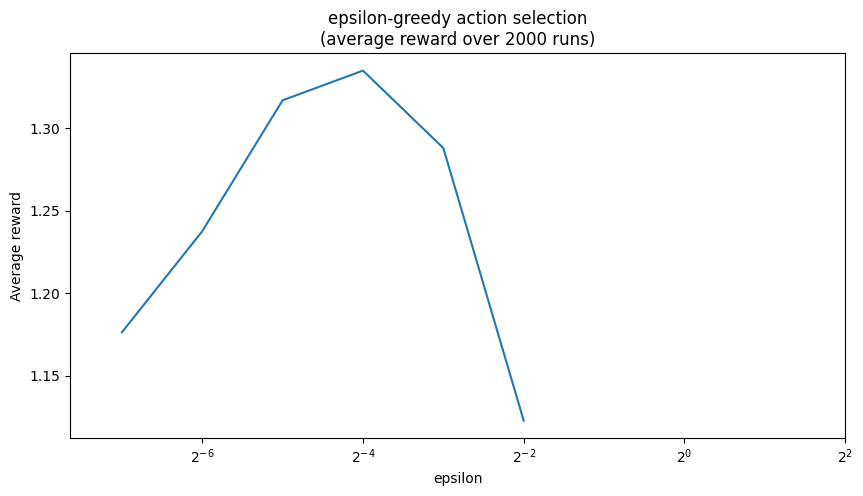

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# epsilon-greedy action selection
def next_action(Q, epsilon=0):
    if np.random.rand() < epsilon:
        return np.random.randint(0, len(Q))
    else:
        return np.argmax(Q)
    
# k-armed bandit
q = []
for i in range(2000):
    q.append(np.random.randn(10))

# rewards with different epsilon
epsilons = [1/128, 1/64, 1/32, 1/16, 1/8, 1/4]
reward_list = []
n_steps = 1000      # number of steps 1000
runs = 2000       # number of iterations 2000

for epsilon in epsilons:
    Q = np.zeros((runs, 10))
    N = np.zeros((runs, 10))
    histories = []
    for j in range(runs):
        history = []
        for i in range(n_steps):
            action = next_action(Q[j], epsilon)
            reward = np.random.normal(loc=q[j][action], scale=1)
            N[j][action] += 1
            Q[j][action] += (reward - Q[j][action]) / N[j][action]       # incremental update
            history.append(reward)
            optimal_choice.append(action == np.argmax(q[j]))
        histories.append(history)
    reward_list.append(np.mean(np.mean(histories, axis=0)))

plt.figure(figsize=(10, 5))
plt.plot(epsilons, reward_list)
plt.title(f'epsilon-greedy action selection\n(average reward over {runs} runs)')
plt.xlabel('epsilon')
plt.ylabel('Average reward')
plt.xscale('log', base=2)
plt.xlim(0.005, 4, 0.5)
plt.show()


### Upper-Confidence-Bound Action Selection

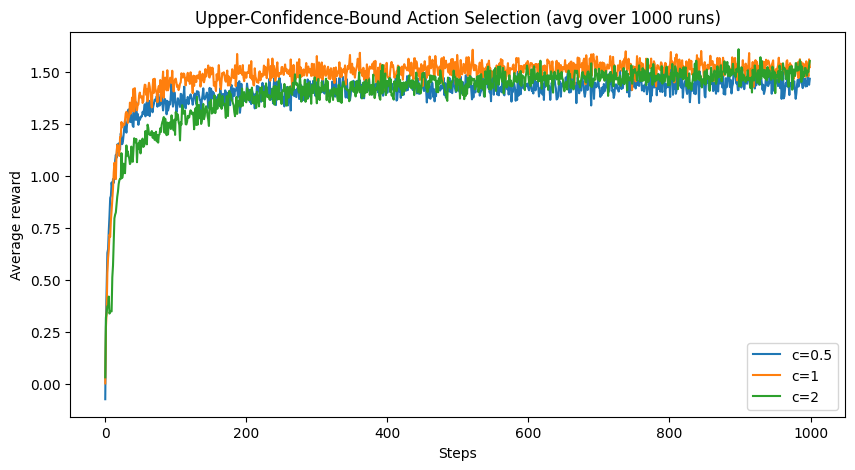

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# k-armed bandit
q = []
for i in range(2000):
    q.append(np.random.randn(10))

# rewards with different epsilon
plt.figure(figsize=(10, 5))
n_steps = 1000      # number of steps 1000
runs = 1000       # number of iterations 2000

for c in [0.5, 1, 2]:
    Q = np.zeros((runs, 10))
    N = np.ones((runs, 10))
    histories = []
    for j in range(runs):
        history = []
        for i in range(n_steps):
            action = np.argmax([stima+c*np.sqrt(np.log(i+1)/N[j][idx]) for idx, stima in enumerate(Q[j])])
            reward = np.random.normal(loc=q[j][action], scale=1)
            N[j][action] += 1
            Q[j][action] += (reward - Q[j][action]) / N[j][action]       # incremental update
            history.append(reward)
        histories.append(history)
    avg_history = np.mean(histories, axis=0)
    plt.plot(avg_history, label='c={}'.format(c))

plt.title(f'Upper-Confidence-Bound Action Selection (avg over {runs} runs)')
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend()
plt.show()

C:\Users\nicol\AppData\Local\Temp\ipykernel_25144\649309411.py:36: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0.005, 4, 0.5)


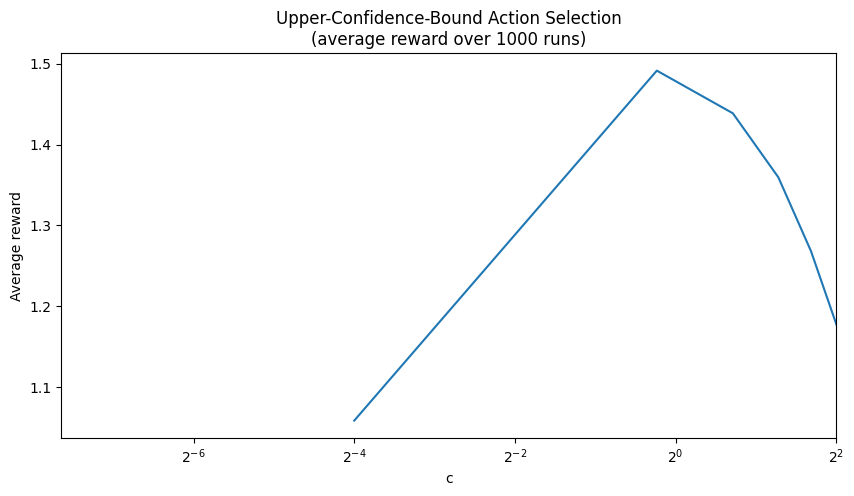

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# k-armed bandit
q = []
for i in range(2000):
    q.append(np.random.randn(10))

# rewards with different epsilon
set_of_c = np.linspace(1/16, 4, 6)
reward_list = []
n_steps = 1000      # number of steps 1000
runs = 1000       # number of iterations 2000

for c in set_of_c:
    Q = np.zeros((runs, 10))
    N = np.ones((runs, 10))
    histories = []
    for j in range(runs):
        history = []
        for i in range(n_steps):
            action = np.argmax([stima+c*np.sqrt(np.log(i+1)/N[j][idx]) for idx, stima in enumerate(Q[j])])
            reward = np.random.normal(loc=q[j][action], scale=1)
            N[j][action] += 1
            Q[j][action] += (reward - Q[j][action]) / N[j][action]       # incremental update
            history.append(reward)
        histories.append(history)
    reward_list.append(np.mean(np.mean(histories, axis=0)))

plt.figure(figsize=(10, 5))
plt.plot(set_of_c, reward_list)
plt.title(f'Upper-Confidence-Bound Action Selection\n(average reward over {runs} runs)')
plt.xlabel('c')
plt.ylabel('Average reward')
plt.xscale('log', base=2)
plt.xlim(0.005, 4, 0.5)
plt.show()


### Softmax action selection

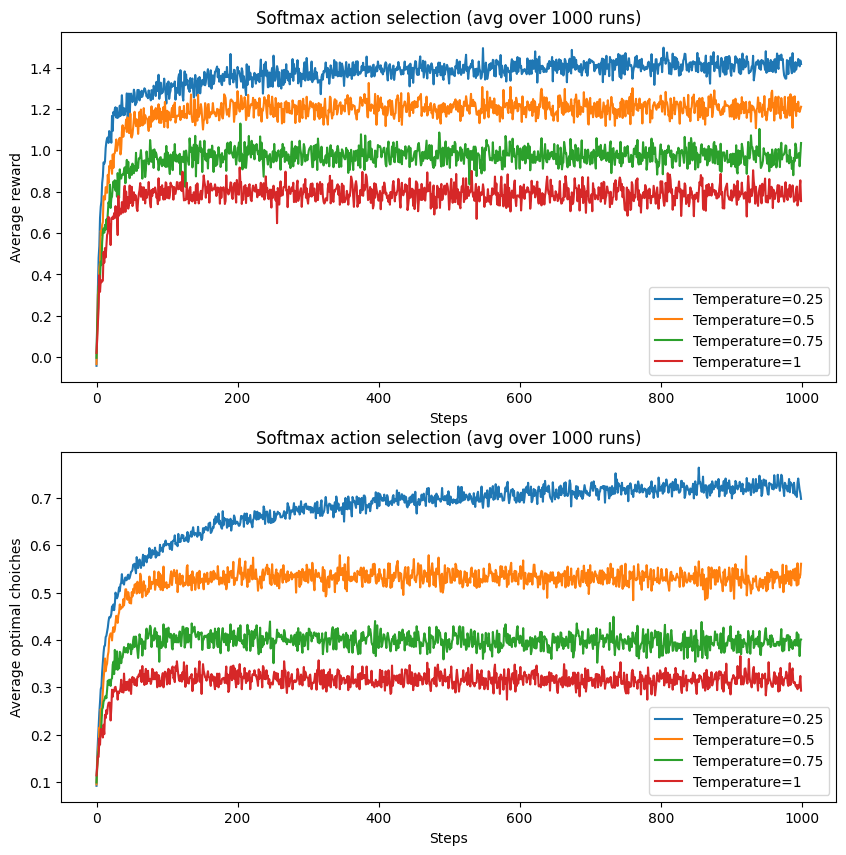

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# softmax action selection with temperature
def softmax(x, T):
    return np.exp(x/T) / np.sum(np.exp(x/T), axis=0)

def next_action(Q, T=1):
    prob = softmax(Q, T)
    return np.random.choice(range(len(Q)), p=prob)

n_steps = 1000      # number of steps 1000
runs = 1000       # number of iterations 2000
    
# k-armed bandit
q = []
for i in range(2000):
    q.append(np.random.randn(10))

# rewards with different epsilon
plt.figure(figsize=(10, 10))
ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)

for T in [0.25, 0.5, 0.75, 1]:
    Q = np.zeros((runs, 10))
    N = np.zeros((runs, 10))
    histories = []
    optimal_choiches = []
    for j in range(runs):
        history = []
        optimal_choice = []
        for i in range(n_steps):
            action = next_action(Q[j], T)
            reward = np.random.normal(loc=q[j][action], scale=1)
            N[j][action] += 1
            Q[j][action] += (reward - Q[j][action]) / N[j][action]       # incremental update
            history.append(reward)
            optimal_choice.append(action == np.argmax(q[j]))
        histories.append(history)
        optimal_choiches.append(optimal_choice)
    avg_history = np.mean(histories, axis=0)
    avg_optimal_choiches = np.mean(optimal_choiches, axis=0)
    ax1.plot(avg_history, label='Temperature={}'.format(T))
    ax2.plot(avg_optimal_choiches, label='Temperature={}'.format(T))

ax1.set_title(f'Softmax action selection (avg over {runs} runs)')
ax1.set_xlabel('Steps')
ax1.set_ylabel('Average reward')
ax1.legend()

ax2.set_title(f'Softmax action selection (avg over {runs} runs)')
ax2.set_xlabel('Steps')
ax2.set_ylabel('Average optimal choiches')
ax2.legend()
plt.show()


C:\Users\nicol\AppData\Local\Temp\ipykernel_25144\1222549585.py:46: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0.005, 4, 0.5)


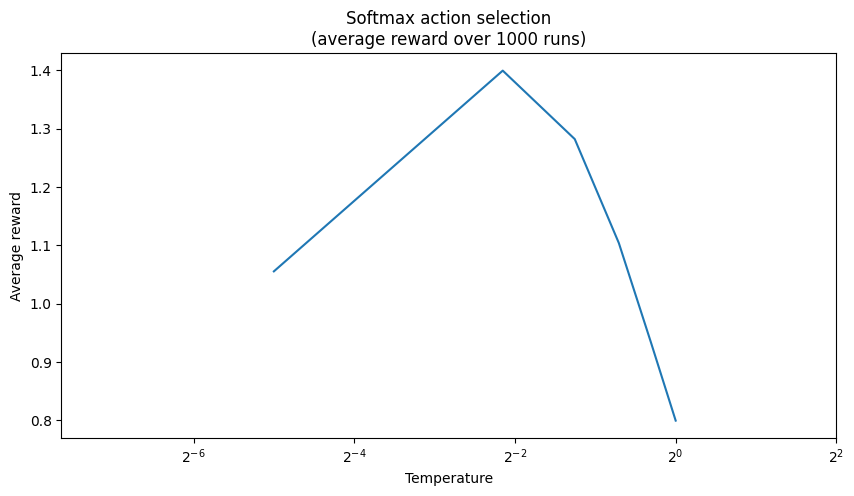

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# softmax action selection with temperature
def softmax(x, T):
    return np.exp(x/T) / np.sum(np.exp(x/T), axis=0)

def next_action(Q, T=1):
    prob = softmax(Q, T)
    return np.random.choice(range(len(Q)), p=prob)

n_steps = 1000      # number of steps 1000
runs = 1000       # number of iterations 2000
    
# k-armed bandit
q = []
for i in range(2000):
    q.append(np.random.randn(10))

# rewards with different epsilon
temperatures = np.linspace(1/32, 1, 6)
reward_list = []

for T in temperatures:
    Q = np.zeros((runs, 10))
    N = np.zeros((runs, 10))
    histories = []
    for j in range(runs):
        history = []
        for i in range(n_steps):
            action = next_action(Q[j], T)
            reward = np.random.normal(loc=q[j][action], scale=1)
            N[j][action] += 1
            Q[j][action] += (reward - Q[j][action]) / N[j][action]       # incremental update
            history.append(reward)
            optimal_choice.append(action == np.argmax(q[j]))
        histories.append(history)
    reward_list.append(np.mean(np.mean(histories, axis=0)))

plt.figure(figsize=(10, 5))
plt.plot(temperatures, reward_list)
plt.title(f'Softmax action selection\n(average reward over {runs} runs)')
plt.xlabel('Temperature')
plt.ylabel('Average reward')
plt.xscale('log', base=2)
plt.xlim(0.005, 4, 0.5)
plt.show()


### Comparison of previous methods

C:\Users\nicol\AppData\Local\Temp\ipykernel_25144\1251743499.py:96: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0.005, 4, 0.5)


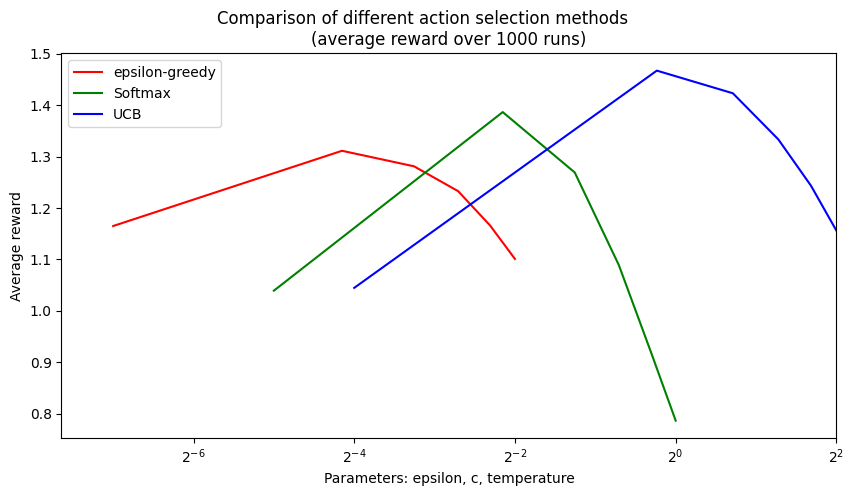

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# action selection functions
def next_action(Q, epsilon=0):
    if np.random.rand() < epsilon:
        return np.random.randint(0, len(Q))
    else:
        return np.argmax(Q)

def softmax(x, T):
    return np.exp(x/T) / np.sum(np.exp(x/T), axis=0)

def next_soft_action(Q, T=1):
    prob = softmax(Q, T)
    return np.random.choice(range(len(Q)), p=prob)

# hyperparameters
n_steps = 1000      # number of steps 1000
runs = 1000       # number of iterations 2000
n_arms = 10
    
# k-armed bandit
q = []
for i in range(2000):
    q.append(np.random.randn(n_arms))

# rewards with different epsilon
epsilons = np.linspace(1/128, 1/4, 6)
epsilon_reward_list = []

for epsilon in epsilons:
    Q = np.zeros((runs, 10))
    N = np.zeros((runs, 10))
    histories = []
    for j in range(runs):
        history = []
        for i in range(n_steps):
            action = next_action(Q[j], epsilon)
            reward = np.random.normal(loc=q[j][action], scale=1)
            N[j][action] += 1
            Q[j][action] += (reward - Q[j][action]) / N[j][action]       # incremental update
            history.append(reward)
        histories.append(history)
    epsilon_reward_list.append(np.mean(np.mean(histories, axis=0)))

# rewards with different epsilon
set_of_c = np.linspace(1/16, 4, 6)
c_reward_list = []

for c in set_of_c:
    Q = np.zeros((runs, 10))
    N = np.ones((runs, 10))
    histories = []
    for j in range(runs):
        history = []
        for i in range(n_steps):
            action = np.argmax([stima+c*np.sqrt(np.log(i+1)/N[j][idx]) \
                                for idx, stima in enumerate(Q[j])])
            reward = np.random.normal(loc=q[j][action], scale=1)
            N[j][action] += 1
            Q[j][action] += (reward - Q[j][action]) / N[j][action]       # incremental update
            history.append(reward)
        histories.append(history)
    c_reward_list.append(np.mean(np.mean(histories, axis=0)))

# rewards with different epsilon
temperatures = np.linspace(1/32, 1, 6)
t_reward_list = []

for T in temperatures:
    Q = np.zeros((runs, 10))
    N = np.zeros((runs, 10))
    histories = []
    for j in range(runs):
        history = []
        for i in range(n_steps):
            action = next_soft_action(Q[j], T)
            reward = np.random.normal(loc=q[j][action], scale=1)
            N[j][action] += 1
            Q[j][action] += (reward - Q[j][action]) / N[j][action]       # incremental update
            history.append(reward)
        histories.append(history)
    t_reward_list.append(np.mean(np.mean(histories, axis=0)))


plt.figure(figsize=(10, 5))
plt.title(f'Comparison of different action selection methods\
          \n(average reward over {runs} runs)')
plt.plot(epsilons, epsilon_reward_list, label='epsilon-greedy', color='red')
plt.plot(temperatures, t_reward_list, label='Softmax', color='green')
plt.plot(set_of_c, c_reward_list, label='UCB', color='blue')
plt.ylabel('Average reward')
plt.xlabel('Parameters: epsilon, c, temperature')
plt.xscale('log', base=2)
plt.xlim(0.005, 4, 0.5)
plt.legend()
plt.show()

### Optimal $\epsilon$ for $\epsilon$-greedy action selection

C:\Users\nicol\AppData\Local\Temp\ipykernel_25144\3105444735.py:79: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0.005, 4, 0.5)
C:\Users\nicol\AppData\Local\Temp\ipykernel_25144\3105444735.py:87: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0.005, 4, 0.5)


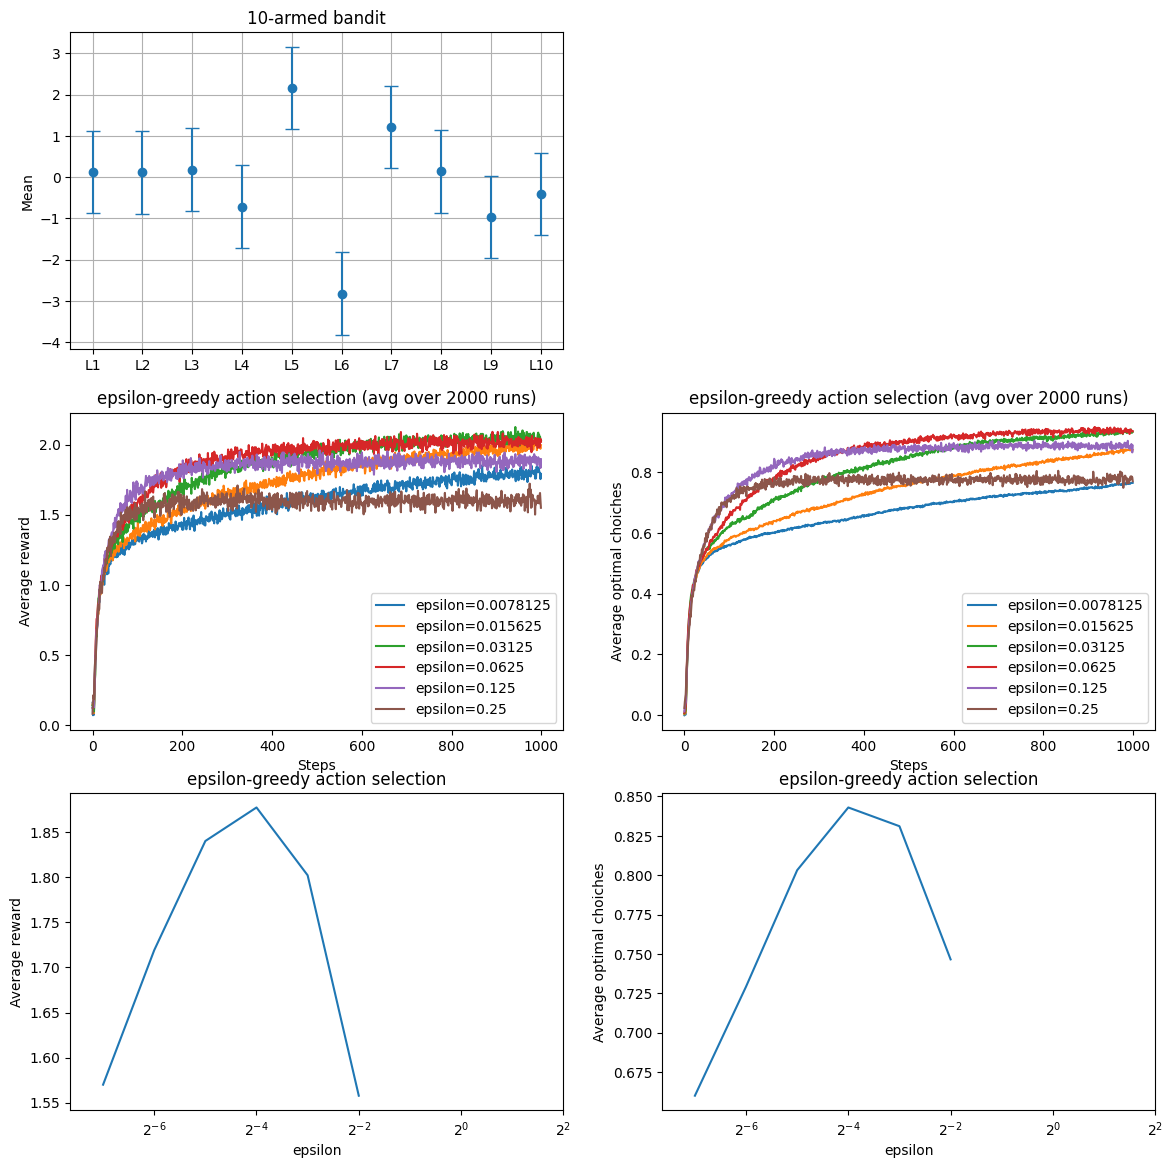

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# epsilon-greedy action selection
def next_action(Q, epsilon=0):
    if np.random.rand() < epsilon:
        return np.random.randint(0, len(Q))
    else:
        return np.argmax(Q)
    
# k-armed bandit
means = np.random.randn(10)  # Mean values for each group
std_devs = np.ones(10)  # Standard deviations for each group
x_values = np.arange(len(means))    # Create x-values for the groups

# Create a plot with error bars
plt.figure(figsize=(14, 14))
ax1 = plt.subplot(3, 2, 1)
# ax2 = plt.subplot(3, 2, 2)
ax3 = plt.subplot(3, 2, 3)
ax4 = plt.subplot(3, 2, 4)
ax5 = plt.subplot(3, 2, 5)
ax6 = plt.subplot(3, 2, 6)
plt.subplot(3, 2, 1)
plt.errorbar(x_values, means, yerr=std_devs, fmt='o', capsize=5)
plt.xticks(x_values, ['L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'L10'])
ax1.set_ylabel('Mean')
ax1.set_title('10-armed bandit')
plt.grid(True)

# rewards with different epsilon
epsilons = [1/128, 1/64, 1/32, 1/16, 1/8, 1/4]
reward_list = []
opt_list = []
n_steps = 1000      # number of steps 1000
runs = 2000       # number of iterations 2000

for epsilon in epsilons:
    Q = np.zeros((runs, 10))
    N = np.zeros((runs, 10))
    histories = []
    optimal_choiches = []
    for j in range(runs):
        history = []
        optimal_choice = []
        for i in range(n_steps):
            action = next_action(Q[j], epsilon)
            reward = np.random.normal(loc=means[action], scale=1)
            N[j][action] += 1
            Q[j][action] += (reward - Q[j][action]) / N[j][action]       # incremental update
            history.append(reward)
            optimal_choice.append(action == np.argmax(means))
        histories.append(history)
        optimal_choiches.append(optimal_choice)
    avg_history = np.mean(histories, axis=0)
    avg_optimal_choiches = np.mean(optimal_choiches, axis=0)
    reward_list.append(np.mean(np.mean(histories, axis=0)))
    opt_list.append(np.mean(np.mean(optimal_choiches, axis=0)))
    ax3.plot(avg_history, label='epsilon={}'.format(epsilon))
    ax4.plot(avg_optimal_choiches, label='epsilon={}'.format(epsilon))


ax3.set_title(f'epsilon-greedy action selection (avg over {runs} runs)')
ax3.set_xlabel('Steps')
ax3.set_ylabel('Average reward')
ax3.legend()

ax4.set_title(f'epsilon-greedy action selection (avg over {runs} runs)')
ax4.set_xlabel('Steps')
ax4.set_ylabel('Average optimal choiches')
ax4.legend()

plt.subplot(3, 2, 5)
plt.plot(epsilons, reward_list)
ax5.set_title(f'epsilon-greedy action selection')
plt.xlabel('epsilon')
plt.ylabel('Average reward')
plt.xscale('log', base=2)
plt.xlim(0.005, 4, 0.5)

plt.subplot(3, 2, 6)
plt.plot(epsilons, opt_list)
ax6.set_title(f'epsilon-greedy action selection')
plt.xlabel('epsilon')
plt.ylabel('Average optimal choiches')
plt.xscale('log', base=2)
plt.xlim(0.005, 4, 0.5)

plt.show()


C:\Users\nicol\AppData\Local\Temp\ipykernel_25144\2471412803.py:74: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0.005, 4, 0.5)
C:\Users\nicol\AppData\Local\Temp\ipykernel_25144\2471412803.py:82: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0.005, 4, 0.5)


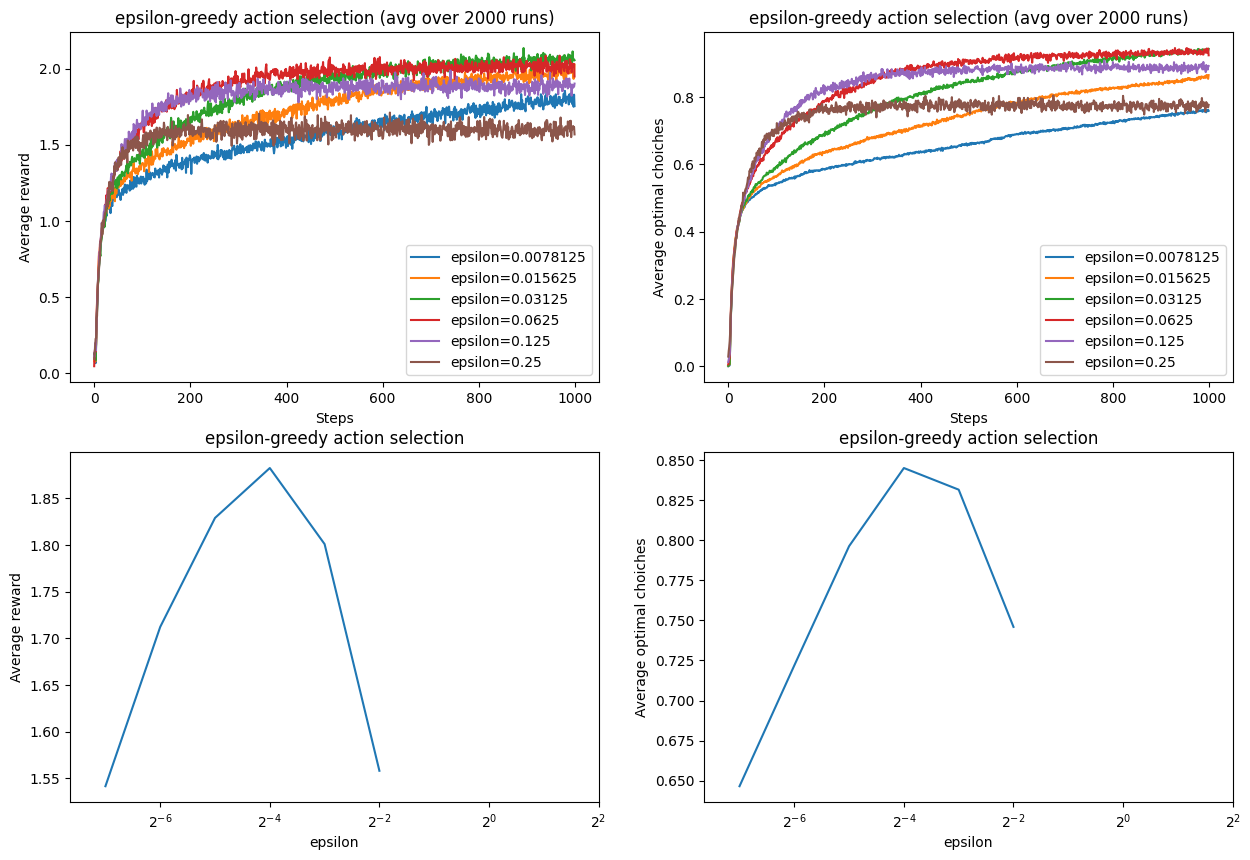

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# epsilon-greedy action selection
def next_action(Q, epsilon=0):
    if np.random.rand() < epsilon:
        return np.random.randint(0, len(Q))
    else:
        return np.argmax(Q)
    
# hyperparameters
n_steps = 1000      # number of steps 1000
runs = 2000       # number of iterations 2000
n_arms = 10
    
# k-armed bandit
q = []
for i in range(2000):
    q.append(np.random.randn(n_arms))

# Create a plot with error bars
plt.figure(figsize=(15, 10))
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)
ax4 = plt.subplot(2, 2, 4)

# rewards with different epsilon
epsilons = [1/128, 1/64, 1/32, 1/16, 1/8, 1/4]
reward_list = []
opt_list = []

for epsilon in epsilons:
    Q = np.zeros((runs, 10))
    N = np.zeros((runs, 10))
    histories = []
    optimal_choiches = []
    for j in range(runs):
        history = []
        optimal_choice = []
        for i in range(n_steps):
            action = next_action(Q[j], epsilon)
            reward = np.random.normal(loc=means[action], scale=1)
            N[j][action] += 1
            Q[j][action] += (reward - Q[j][action]) / N[j][action]       # incremental update
            history.append(reward)
            optimal_choice.append(action == np.argmax(means))
        histories.append(history)
        optimal_choiches.append(optimal_choice)
    avg_history = np.mean(histories, axis=0)
    avg_optimal_choiches = np.mean(optimal_choiches, axis=0)
    reward_list.append(np.mean(np.mean(histories, axis=0)))
    opt_list.append(np.mean(np.mean(optimal_choiches, axis=0)))
    ax1.plot(avg_history, label='epsilon={}'.format(epsilon))
    ax2.plot(avg_optimal_choiches, label='epsilon={}'.format(epsilon))


ax1.set_title(f'epsilon-greedy action selection (avg over {runs} runs)')
ax1.set_xlabel('Steps')
ax1.set_ylabel('Average reward')
ax1.legend()

ax2.set_title(f'epsilon-greedy action selection (avg over {runs} runs)')
ax2.set_xlabel('Steps')
ax2.set_ylabel('Average optimal choiches')
ax2.legend()

plt.subplot(2, 2, 3)
plt.plot(epsilons, reward_list)
ax3.set_title(f'epsilon-greedy action selection')
plt.xlabel('epsilon')
plt.ylabel('Average reward')
plt.xscale('log', base=2)
plt.xlim(0.005, 4, 0.5)

plt.subplot(2, 2, 4)
plt.plot(epsilons, opt_list)
ax4.set_title(f'epsilon-greedy action selection')
plt.xlabel('epsilon')
plt.ylabel('Average optimal choiches')
plt.xscale('log', base=2)
plt.xlim(0.005, 4, 0.5)

plt.show()